In [39]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn
from astropy.io import ascii
import os
import sys
from ipywidgets import interactive, widgets,fixed
from IPython.display import Audio, display
import matplotlib.ticker as ticker
from matplotlib.animation import FuncAnimation,FFMpegWriter
from matplotlib import rc,rcParams
rc('text', usetex=True)
rcParams['figure.figsize'] = (15., 6.0)
rcParams['ytick.labelsize'],rcParams['xtick.labelsize'] = 17.,17.
rcParams['axes.labelsize']=19.
rcParams['legend.fontsize']=17.
rcParams['text.latex.preamble'] = ['\\usepackage{siunitx}']
import seaborn
seaborn.despine()
seaborn.set_style('white', {'axes.linewidth': 0.5, 'axes.edgecolor':'black'})
seaborn.despine(left=True)
from scipy.integrate import quad
%load_ext autoreload

In [40]:
%autoreload 1

In [41]:
%aimport f

In [69]:
gammal=5./3.
rl=1.e-4
pl=1.e-8*f.PRS0
ul=np.sqrt(15.)/4.
hl=1.0+gammal/(gammal-1.0)*pl/rl
ll=1.0/np.sqrt(1.-ul*ul)

gammar=5./3.
rr=1.
pr=1.e-11*f.PRS0
ur=0.0
hr=1.0+gammar/(gammar-1.0)*pr/rr
lr=1.0/np.sqrt(1.-ur*ur)

In [70]:
def deltar(x): 
    return ((gammar-1.0)*(pr-x)/(gammar*x))**2.0-4.0*(1.0+(gammar-1.0)*(pr-x)/(gammar*x))*(hr*(pr-x)/rr-hr**2.0)
def hbr(x):
    return ((gammar-1.0)*(pr-x)/(gammar*x)+np.sqrt(deltar(x)))/(2.0*(1.0+(gammar-1.0)*(pr-x)/(gammar*x)))
def deltal(x):
    return ((gammal-1.0)*(pl-x)/(gammal*x))**2.0-4.0*(1.0+(gammal-1.0)*(pl-x)/(gammal*x))*(hl*(pl-x)/rl-hl**2.0)
def hbl(x):
    return ((gammal-1.0)*(pl-x)/(gammal*x)+np.sqrt(deltal(x)))/(2.0*(1.0+(gammal-1.0)*(pl-x)/(gammal*x)))
def rbr(x): return (gammar*x)/((gammar-1.0)*(hbr(x)-1.0))
def rbl(x): return (gammal*x)/((gammal-1.0)*(hbl(x)-1.0))
def jplus(x): return +np.sqrt((x-pr)/((hr/rr)-(hbr(x)/rbr(x))))
def jminus(x): return -np.sqrt((x-pl)/((hl/rl)-(hbl(x)/rbl(x))))
def vsplus(x): return (rr*rr*lr*lr*ur+jplus(x)**2.0*np.sqrt(1.0+(rr/jplus(x))**2.0))/(rr*rr*lr*lr+jplus(x)**2.0)
def vsminus(x): return (rl*rl*ll*ll*ul-jminus(x)**2.0*np.sqrt(1.0+(rl/jminus(x))**2.0))/(rl*rl*ll*ll+jminus(x)**2.0)

def wsr(x): return 1.0/np.sqrt(1-(vsplus(x)**2.0))
def wsl(x): return 1.0/np.sqrt(1-(vsminus(x)**2.0))

def ubr(x): return (hr*lr*ur+wsr(x)*(x-pr)/jplus(x))/(hr*lr+((x-pr)*(wsr(x)*ur/jplus(x)+1.0/(rr*lr))))
def ubl(x): return (hl*ll*ul+wsl(x)*(x-pl)/jminus(x))/(hl*ll+((x-pl)*(wsl(x)*ul/jminus(x)+1.0/(rl*ll))))
def gbr(x): return 1./np.sqrt(1.-ubr(x)**2.)
def gbl(x): return 1./np.sqrt(1.-ubl(x)**2.)

In [71]:
kl=pl/rl**gammal
def csl(x): return 1./np.sqrt(((kl/x)**(1.-1./gammal)/kl/gammal+1./(gammal-1.)))
def alplus(x): return ((np.sqrt(gammal-1.)-csl(x))*(np.sqrt(gammal-1.)+csl(pl))/(np.sqrt(gammal-1.)+csl(x))/(np.sqrt(gammal-1.)-csl(pl)))**(2./np.sqrt(gammal-1.))
def alminus(x): return 1./alplus(x)
def ublplus(x): return ((1.+ul)*alplus(x)-(1.-ul))/((1.+ul)*alplus(x)+(1.-ul))
def gblplus(x): return 1./np.sqrt(1.-ublplus(x)**2.)
def ublminus(x): return ((1.+ul)*alminus(x)-(1.-ul))/((1.+ul)*alminus(x)+(1.-ul))
def gblminus(x): return 1./np.sqrt(1.-ublminus(x)**2.)

kr=pr/rr**gammar
def csr(x): return 1./np.sqrt(((kr/x)**(1.-1./gammar)/kr/gammar+1./(gammar-1.)))
def arplus(x): return ((np.sqrt(gammar-1.)-csr(x))*(np.sqrt(gammar-1.)+csr(pr))/(np.sqrt(gammar-1.)+csr(x))/(np.sqrt(gammar-1.)-csr(pr)))**(2./np.sqrt(gammar-1.))
def arminus(x): return 1./arplus(x)
def ubrplus(x): return ((1.+ur)*arplus(x)-(1.-ur))/((1.+ur)*arplus(x)+(1.-ur))
def gbrplus(x): return 1./np.sqrt(1.-ubrplus(x)**2.)
def ubrminus(x): return ((1.+ur)*arminus(x)-(1.-ur))/((1.+ur)*arminus(x)+(1.-ur))
def gbrminus(x): return 1./np.sqrt(1.-ubrminus(x)**2.)

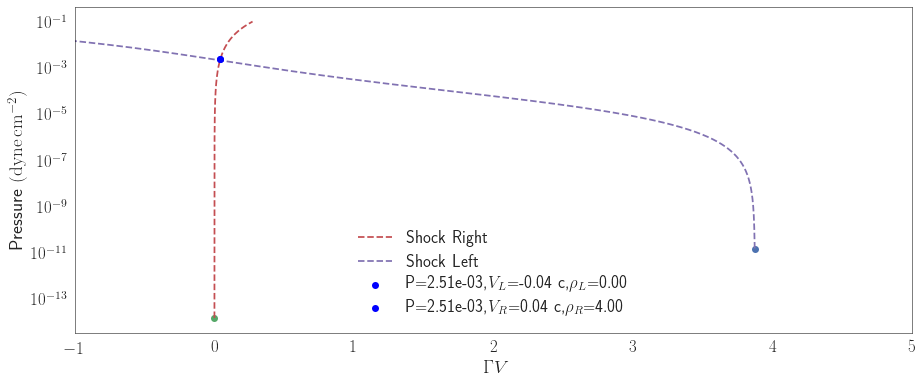

In [109]:
t=np.logspace(-14,-1,1000)
plt.xlabel('$\Gamma V $')
plt.ylabel('Pressure $(\si{dyne.cm^{-2}})$')
plt.plot([ll*ul],[pl],'o')
plt.plot([lr*ur],[pr],'o')
plt.plot((gbr(t)*ubr(t))[t>pr],t[t>pr],'--',label='Shock Right')
plt.plot((gbl(t)*ubl(t))[t>pl],t[t>pl],'--',label='Shock Left')

ind=np.abs((gbr(t)*ubr(t)**2+t**2)-(gbl(t)*ubl(t)**2+t**2)).argmin()
plt.plot([(gbr(t)*ubr(t))[ind]],[t[ind]],'o',color='b',label='P={:.2e},$V_L$={:.2f} c,$\\rho _L$={:.2f}'.format(t[ind],ubl(t)[ind],rbl(t)[ind]))
plt.plot([(gbr(t)*ubr(t))[ind]],[t[ind]],'o',color='b',label='P={:.2e},$V_R$={:.2f} c,$\\rho _R$={:.2f}'.format(t[ind],ubr(t)[ind],rbr(t)[ind]))
# plt.plot((gblminus(t)*ublminus(t))[t<pl],t[t<pl],label='Rarefunction Left Minus')
# plt.plot((gbrminus(t)*ubrminus(t))[t<pr],t[t<pr],label='Rarefunction Right Minus')
# plt.plot((gblplus(t)*ublplus(t))[t<pl],t[t<pl],label='Rarefunction Left Plus')
# plt.plot((gbrplus(t)*ubrplus(t))[t<pr],t[t<pr],label='Rarefunction Right Plus')
plt.legend()
#plt.ylim([1e-11,1e4])
plt.xlim([-1,5])
plt.yscale('log')
plt.savefig('/home/astromix/astro/MasterThesis/Document/DataImages/Shock-Shock.png',bbox_inches='tight')

In [74]:
(gbl(t)*ubl(t))[ind],t[ind],gbl(t)[ind]

(0.038166405041499984, 0.0021199534575360689, 1.0007280721923373)

In [75]:
(gbr(t)*ubr(t))[ind],t[ind],gbr(t)[ind]

(0.039872387069599141, 0.0021199534575360689, 1.0007945879403166)

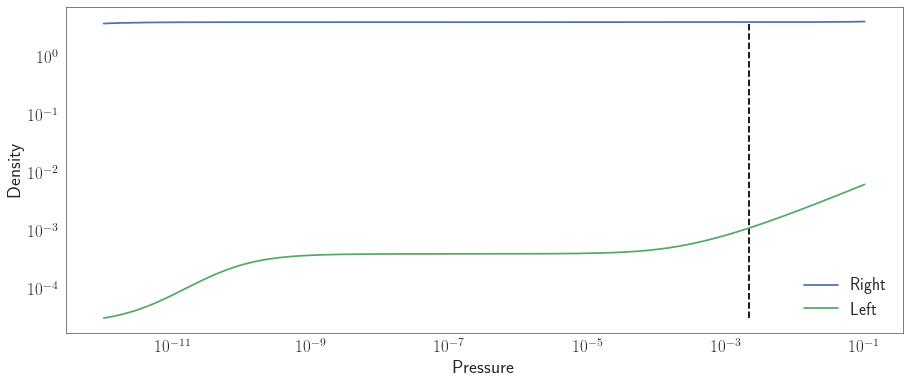

In [76]:
plt.plot(t,rbr(t),label='Right')
plt.plot(t,rbl(t),label='Left')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Pressure')
plt.ylabel('Density')
plt.legend()
plt.vlines([t[ind]],min(rbr(t).min(),rbl(t).min()),max(rbr(t).max(),rbl(t).max()),linestyles='--')

In [77]:
rbl(t)[ind],ubl(t)[ind],t[ind]

(0.0011137735221756308, 0.038138637360184399, 0.0021199534575360689)

In [78]:
rbr(t)[ind],ubr(t)[ind],t[ind]

(4.0019864697446792, 0.039840730105923566, 0.0021199534575360689)

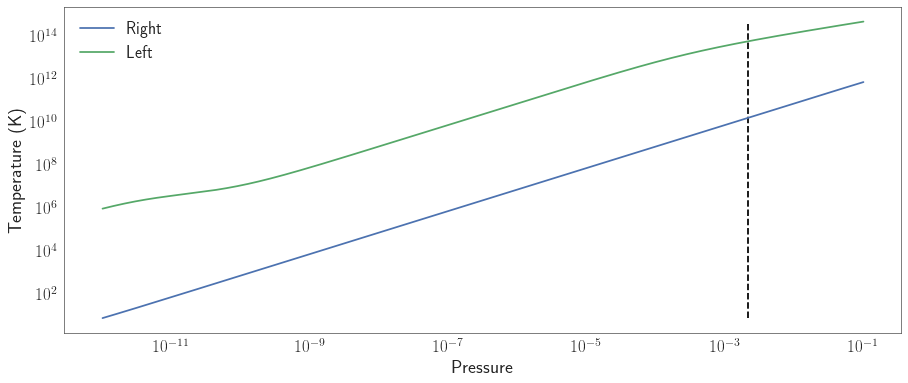

In [79]:
Tr=f.Temp0*(hbr(t)-1.)
Tl=f.Temp0*(hbl(t)-1.)
plt.plot(t,Tr,label='Right')
plt.plot(t,Tl,label='Left')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('Pressure')
plt.ylabel('Temperature (K)')
plt.vlines([t[ind]],min(Tr.min(),Tl.min()),max(Tr.max(),Tl.max()),linestyles='--')

In [80]:
np.log10(Tl[ind]),np.log10(Tr[ind])

(13.714549340023993, 10.159070613180983)

In [1]:
Radius = 1.0
Density1 = 10.
P0=1e-8
T0=10891304347826.088
def rho(r,a): return np.piecewise(r, [r < Radius , r >= Radius], [lambda r: Density1/r**a, 1.])
def mass(r,a): return 4.*np.pi*r**2 * rho(r,a)
def massmo(r,a): return 4.*np.pi*r**2 * rho(r,a) *24.73 #(10pc)^3 * hydrogen_mass /cm^3 = 24.73 Mo

In [2]:
Tmin=9.914745e-06

In [3]:
print (1e-9*T0/1e-9)

1.08913043478e+13


In [4]:
r=np.linspace(0,3,500)
plt.ylabel('Number Density $(\si{cm^{-3}})$')
plt.xlabel('Radius $(\SI{10}{pc})$')
plt.yscale('log')
plt.plot(r,rho(r,2.3),label=-2.3)
plt.plot(r,rho(r,2.),label=-2)
plt.plot(r,rho(r,3.),label=-3)
plt.legend()

NameError: name 'np' is not defined

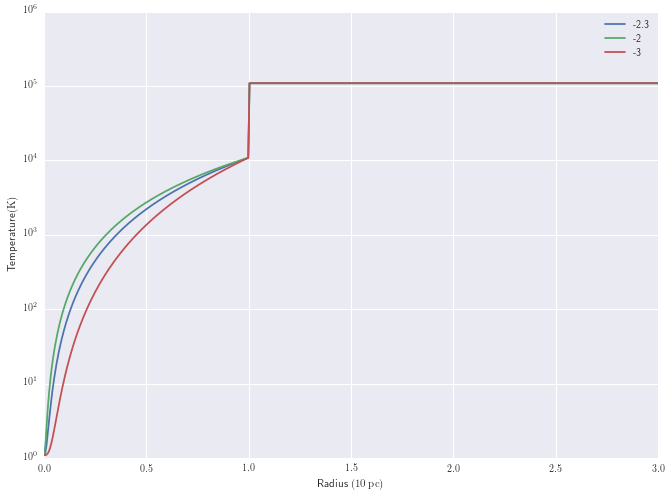

In [80]:
plt.ylabel('Temperature$(\si{K})$')
plt.xlabel('Radius $(\SI{10}{pc})$')
plt.yscale('log')
plt.plot(r,P0*T0/rho(r,2.3),label=-2.3)
plt.plot(r,P0*T0/rho(r,2.),label=-2)
plt.plot(r,P0*T0/rho(r,3.),label=-3)
plt.legend()

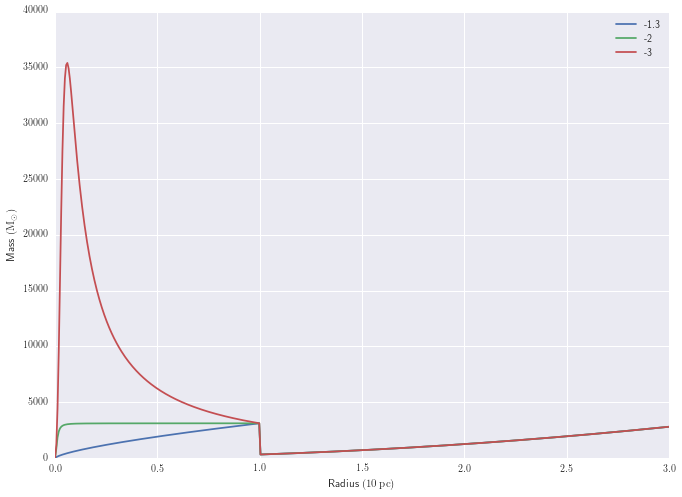

In [73]:
plt.plot(r,massmo(r,1.3),label=-1.3)
plt.plot(r,massmo(r,2.),label=-2)
plt.plot(r,massmo(r,3.),label=-3)
plt.ylabel('Mass $(\si{M_\odot})$')
plt.xlabel('Radius $(\SI{10}{pc})$')
plt.legend()

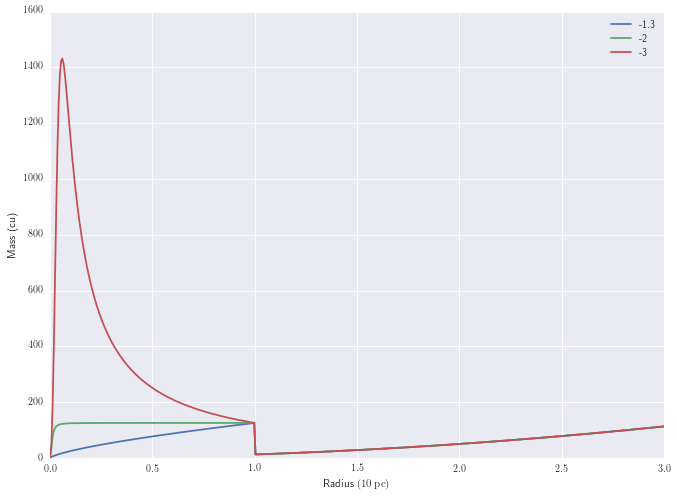

In [74]:
plt.plot(r,mass(r,1.3),label=-1.3)
plt.plot(r,mass(r,2.),label=-2)
plt.plot(r,mass(r,3.),label=-3)
plt.ylabel('Mass (cu)')
plt.xlabel('Radius $(\SI{10}{pc})$')
plt.legend()

In [77]:
TotalMass=quad(massmo,0,Radius,args=1.3)[0]
print u'Total Mass: {:e} M☉'.format(TotalMass)
TotalMass=quad(massmo,0,Radius,args=2.)[0]
print u'Total Mass: {:e} M☉'.format(TotalMass)
TotalMass=quad(massmo,0,Radius,args=3.)[0]
print u'Total Mass: {:e} M☉'.format(TotalMass)

Total Mass: 1.827314e+03 M☉
Total Mass: 3.059159e+03 M☉
Total Mass: 9.540983e+03 M☉


In [49]:
Density1*4.*np.pi*Radius*24.73

994.4523049379275

In [2]:
cooltable=np.loadtxt('cooltable.dat')

IOError: [Errno 2] No such file or directory: 'cooltable.dat'

In [4]:
T= cooltable[:,0]
Lambda = cooltable[:,1]

NameError: name 'cooltable' is not defined

In [ ]:
#plt.plot(TT,fc(TT))
plt.yscale('log')
plt.xlim(0,1000)
plt.plot(T,Lambda,'o')

In [3]:
plt.loglog(T,Lambda,linewidth=5.,label='$\Lambda (T) \, (\si{ergs.cm^3 s^{-1}})$')
#plt.ylabel('$\Lambda (T) \, (\si{ergs.cm^3 s^{-1}})$',fontsize=25)
plt.xlabel('Temperature (K)',fontsize=25)
plt.yticks(fontsize=26)
plt.xticks(fontsize=29)
plt.tight_layout()
plt.legend(loc=4,fontsize=30)
#plt.savefig('LambdaT.png')

NameError: name 'T' is not defined

In [13]:
from scipy.optimize import curve_fit

In [ ]:
curve_fit()

In [27]:
def f2(x,a,b,c): return a*x**2+b*x+c
def f1(x,b,c): return b*x+c

In [47]:
p,dp2=curve_fit(f2,T[T>1e8],Lambda[T>1e8],[0,6.6e-32,1e-21])
dp=np.sqrt(np.diag(dp2))

In [48]:
p

array([  2.65911050e-42,   4.53023788e-32,   4.10642186e-23])

$$
2.659\times 10^{-42} x^2 + 4.53 \times 10^{-32} x + 4.106\times 10^{-23}
$$

In [46]:
dp[0]/p[0],dp[1]/p[1],dp[2]/p[2]

(0.028120164461815242, 0.013654106744734372, 0.018721179167672054)

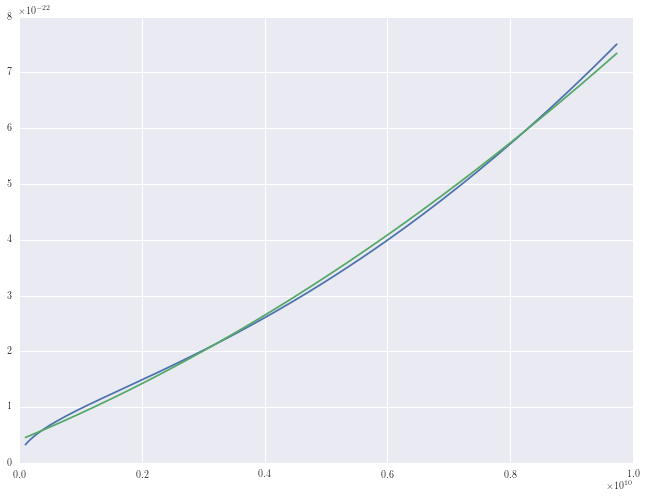

In [34]:
plt.plot(T[T>1e8],Lambda[T>1e8])
plt.plot(T[T>1e8],f2(T[T>1e8],p[0],p[1],p[2]))

In [53]:
TT=np.logspace(8,11)

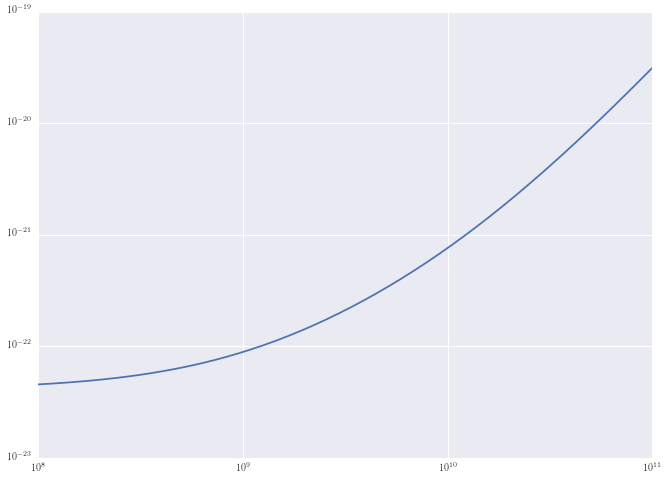

In [55]:
plt.loglog(TT,f2(TT,p[0],p[1],p[2]))